## Imports

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from collections import Counter
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [15]:
# Load the cleaned dataset
listings_cleaned = pd.read_csv('../data/cleaned_listings.csv')

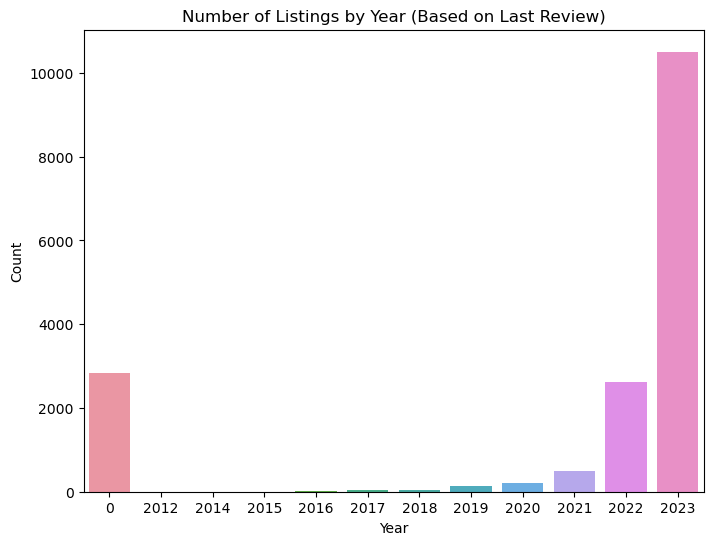

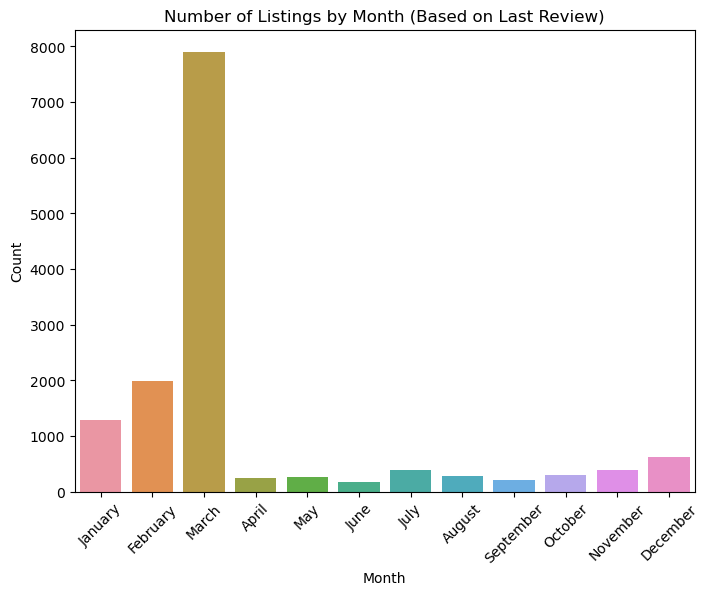

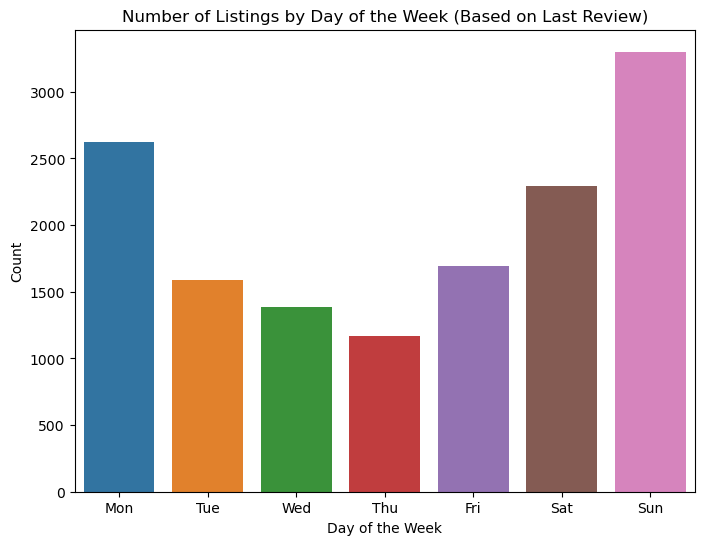

In [16]:
# Convert the 'last_review' column to datetime format
listings_cleaned['last_review'] = pd.to_datetime(listings_cleaned['last_review'])

# Extract year, month, and day of the week as new features
listings_cleaned['year'] = listings_cleaned['last_review'].dt.year
listings_cleaned['month'] = listings_cleaned['last_review'].dt.month
listings_cleaned['day_of_week'] = listings_cleaned['last_review'].dt.dayofweek

# Fill missing values with 0
listings_cleaned['year'].fillna(0, inplace=True)

# Convert the 'year' column to integer type
listings_cleaned['year'] = listings_cleaned['year'].astype(int)

# Plot the counts of listings by year
plt.figure(figsize=(8, 6))
sns.countplot(x='year', data=listings_cleaned)
plt.title('Number of Listings by Year (Based on Last Review)')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

# Plot the counts of listings by month
plt.figure(figsize=(8, 6))
sns.countplot(x='month', data=listings_cleaned)
plt.title('Number of Listings by Month (Based on Last Review)')
plt.xlabel('Month')
plt.ylabel('Count')

# Map month numbers to month names
month_labels = [calendar.month_name[i] for i in range(1, 13)]
plt.xticks(ticks=range(12), labels=month_labels, rotation=45)

plt.show()

# Plot the counts of listings by day of the week
plt.figure(figsize=(8, 6))
sns.countplot(x='day_of_week', data=listings_cleaned)
plt.title('Number of Listings by Day of the Week (Based on Last Review)')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()


**By extracting the year, month, and day of the week, one can understand how the listings' characteristics and availability change over different time periods. Based on the bar plots above, the number of ratings based on the "last_ review" column had a great impact in the year 2023, particularly in the month of March and on Sundays.This approach would provide a more accurate understanding of how prices may fluctuate based on the specific time of year, month, and even the day of the week, ultimately assisting in making informed pricing decisions**.

In [17]:
# Example of binning the 'price' column into three categories
bins = [0,50,100, np.inf]
labels = ['Low', 'Medium', 'High']
listings_cleaned['price_category'] = pd.cut(listings_cleaned['price'], bins=bins, labels=labels)


**To analyze the prices of listings, the prices were categorized  into different price ranges. In this code we use binning to divide the prices into three categories: 'Low', 'Medium', and 'High**.
1. Prices less than or equal to 50 are categorized as 'Low'.
2. Prices greater than 50 and less than or equal to 100 are categorized as 'Medium'.
3. Prices greater than 100 are categorized as 'High'.


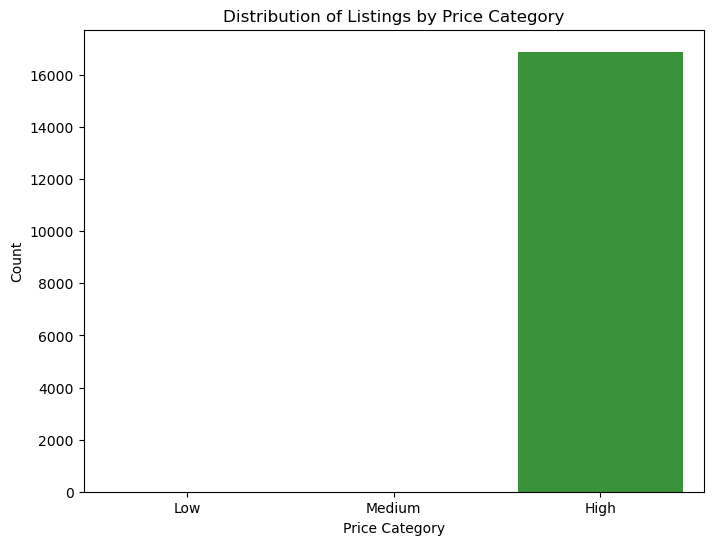

In [18]:
# Calculate the count of listings in each price category
price_category_counts = listings_cleaned['price_category'].value_counts()

# Plot the count of listings by price category
plt.figure(figsize=(8, 6))
sns.barplot(x=price_category_counts.index, y=price_category_counts.values)
plt.title('Distribution of Listings by Price Category')
plt.xlabel('Price Category')
plt.ylabel('Count')
plt.show()


In [19]:
# Aggregate features
listings_cleaned['avg_bedrooms_per_guest'] = listings_cleaned['bedrooms'] / listings_cleaned['accommodates']
listings_cleaned['beds_to_bedrooms_ratio'] = listings_cleaned['beds'] / listings_cleaned['bedrooms']

# Check the updated dataset
listings_cleaned[['accommodates', 'bedrooms', 'beds', 'avg_bedrooms_per_guest', 'beds_to_bedrooms_ratio']].head()


,accommodates,bedrooms,beds,avg_bedrooms_per_guest,beds_to_bedrooms_ratio
0,2,1.0,1.0,0.500000,1.0
1,2,2.0,4.0,1.000000,2.0
2,8,4.0,6.0,0.500000,1.5
3,6,2.0,4.0,0.333333,2.0
4,7,2.0,5.0,0.285714,2.5


**The aggregated features enhance the dataset by capturing additional information related to the capacity and comfort level of the listings. The "avg_bedrooms_per_guest" feature is calculated by dividing the "bedrooms" column by the "accommodates" column, providing insights into the average number of bedrooms per accommodated guest. This feature helps assess the level of comfort and privacy offered to each guest**.

**The "beds_to_bedrooms_ratio" feature is derived by dividing the "beds" column by the "bedrooms" column. It represents the ratio of beds to bedrooms, indicating the availability of extra sleeping space relative to the number of bedrooms. This feature can provide insights into the flexibility of sleeping arrangements**.

**By incorporating these aggregated features into the dataset, the model gains valuable information about the capacity and comfort level of the listings. This additional information can contribute to predicting listing prices more accurately and provide a deeper understanding of the factors influencing the prices in the "Airbnb Price Predictions Florida Edition" project**.

## Scaling Numeric Features

In [20]:
numeric_features = listings_cleaned.select_dtypes(include='number')

# Print the names of the numeric features
numeric_features.columns


Index(['id', 'scrape_id', 'host_id', 'host_listings_count',
       'host_total_listings_count', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_updated', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calcu

In [21]:
# Apply scaling to numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numeric_features)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:1047: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:1052: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:1072: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


**Scaling the features ensures that they are on a similar scale, which can be beneficial for modeling**.

In [22]:
# Define the categorical features
categorical_features = listings_cleaned[['room_type', 'property_type']]

**The columns "property_type" and "room_type" in the dataset have a limited number of distinct values that categorize the properties and rooms in the Airbnb listings. By encoding these categorical variables, the values can be represented numerically, enabling the models to understand and utilize the categorical information during the prediction process. Categorical encoding allows the models to learn from and make predictions based on these categorical features, ensuring compatibility between the data and the modeling algorithms**

In [23]:
# Apply categorical encoding to categorical features
encoder = OneHotEncoder()  # or LabelEncoder() or TargetEncoder()
encoded_features = encoder.fit_transform(categorical_features)

## Feature Selection

In [24]:
X = listings_cleaned[['property_type', 'room_type', 'accommodates']]
y = listings_cleaned['price']

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Define the categorical columns
categorical_columns = ['property_type', 'room_type']

# Perform one-hot encoding on the categorical features
preprocessor = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), categorical_columns)],
    remainder='passthrough'
)

# Apply preprocessing to the data
X_encoded = preprocessor.fit_transform(listings_cleaned)

# Define the target variable
y = listings_cleaned['price']

# Initialize and fit the model
model = RandomForestRegressor()
model.fit(X_encoded, y)
feature_importances = model.feature_importances_


ValueError: could not convert string to float: 'https://www.airbnb.com/rooms/827736378366911479'

In [43]:
listings_cleaned.columns

Index(['id', 'last_scraped', 'name', 'description', 'neighborhood_overview',
       'host_name', 'host_location', 'neighbourhood', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms_text',
       'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights',
       'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'last_review',
       'reviews_per_month', 'year', 'month', 'day_of_week',
       'avg_bedrooms_per_guest', 'beds_to_bedrooms_ratio', 'name_length',
       'description_length', 'amenities_present', 'location_present',
       'property type_present'],
      dtype='object')

In [ ]:
listings_cleaned['price'] = listings_cleaned['price'].astype(float)
